In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.isnull().mean()

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

In [8]:
df.fillna(df.mean(),inplace=True)

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

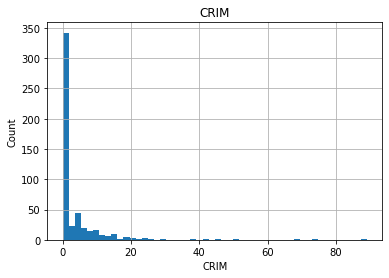

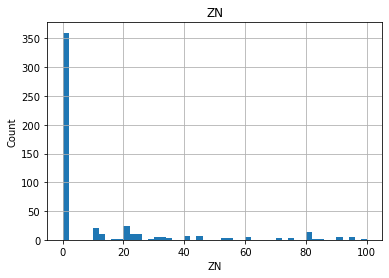

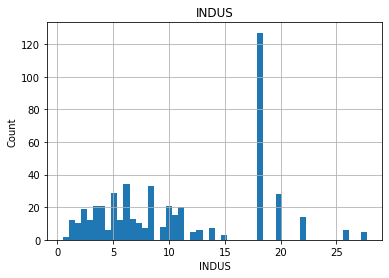

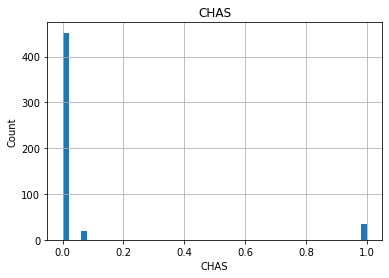

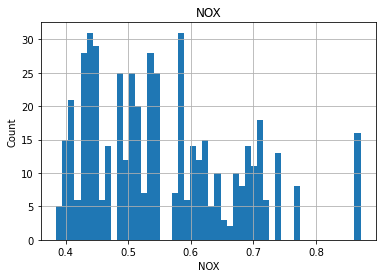

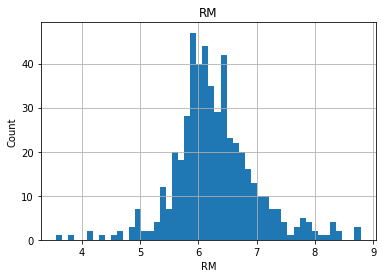

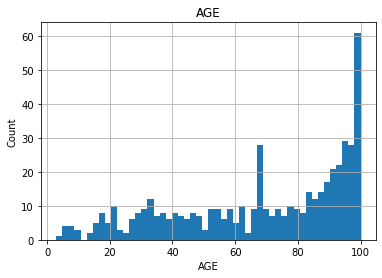

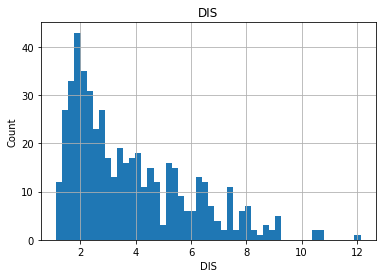

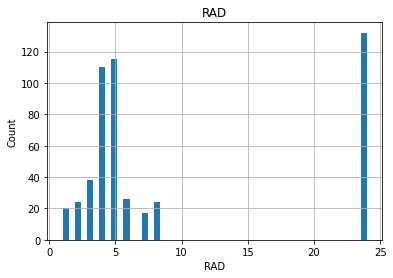

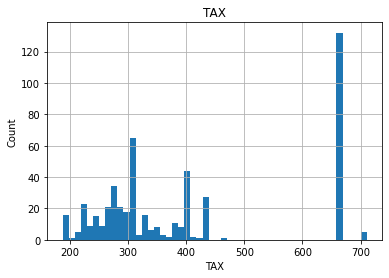

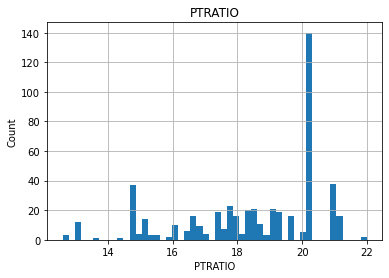

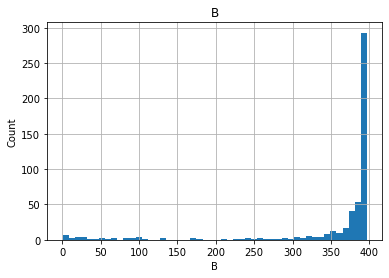

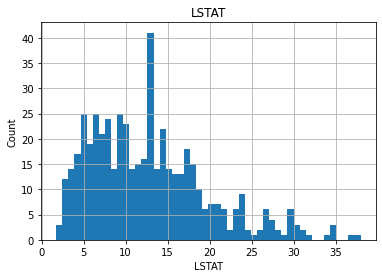

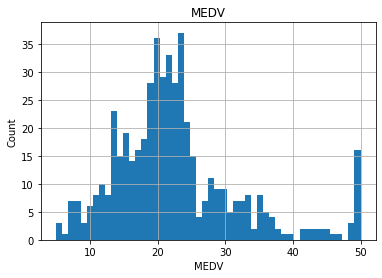

In [11]:
for feature in df:
    data=df.copy()
    figure=data[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [12]:
for feature in df.columns:
    df[feature] = (df[feature])**1/3

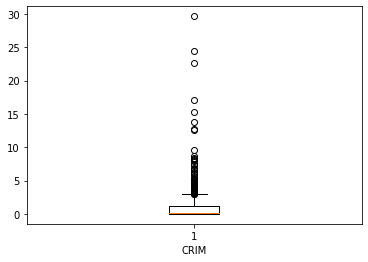

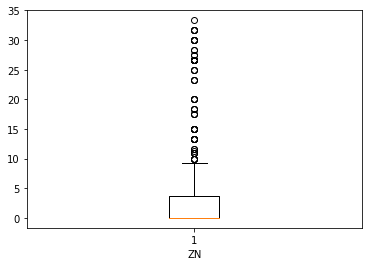

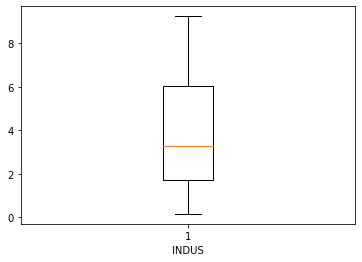

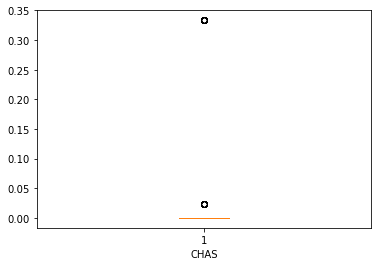

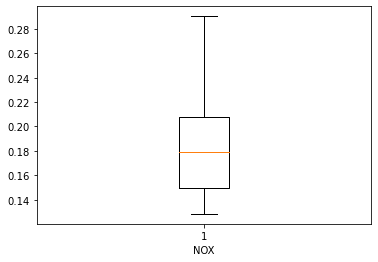

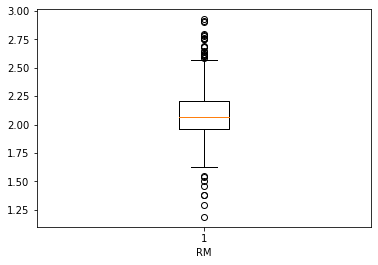

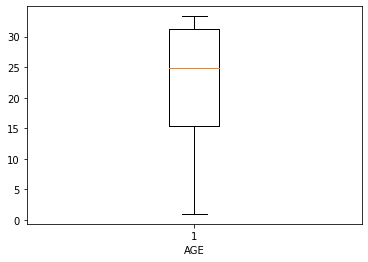

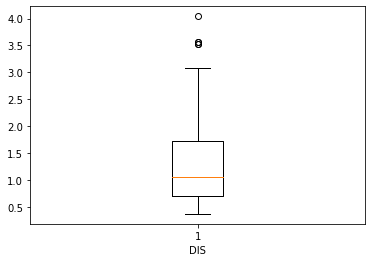

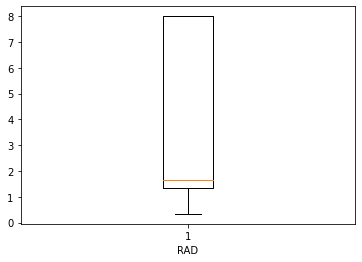

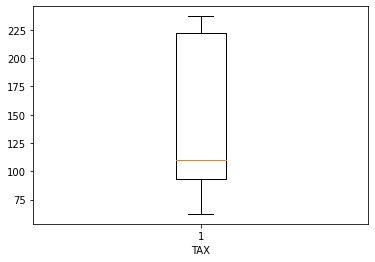

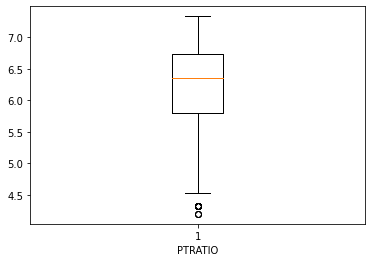

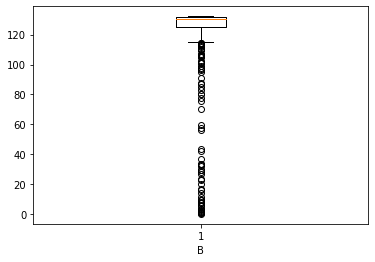

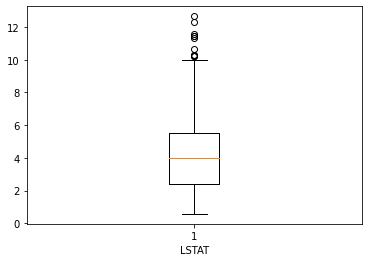

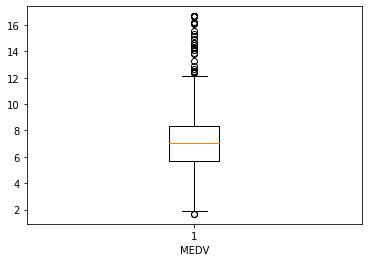

In [13]:
for feature in df.columns:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [14]:
#df = df.drop(columns=['PTRATIO','B','LSTAT','CHAS'],axis=1)

In [15]:
df = df.drop(columns=['CHAS'],axis=1)

In [16]:
for feature in df.columns:
    IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bridge = df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = df[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = df[feature].quantile(0.75)+(IQR*3)
    
    
    df.loc[df[feature]<=lower_bridge,feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge,feature] = upper_bridge
    
    

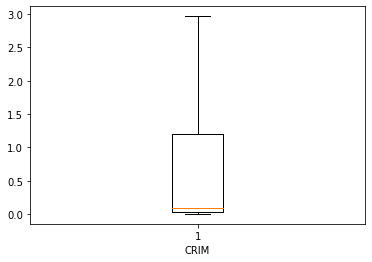

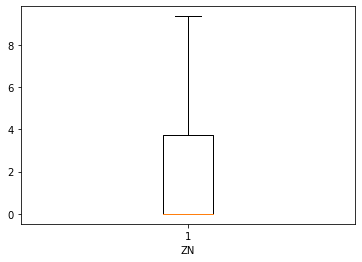

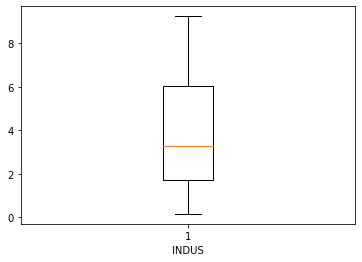

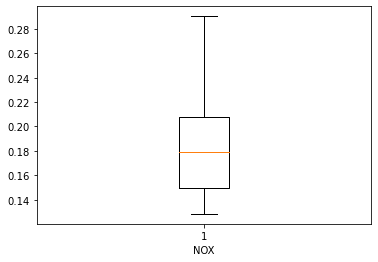

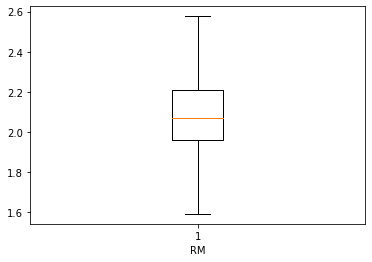

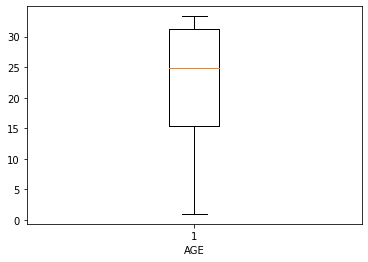

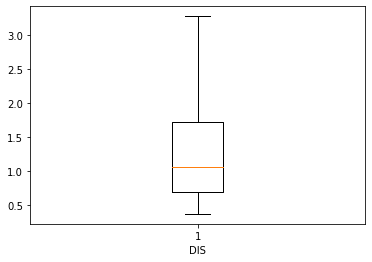

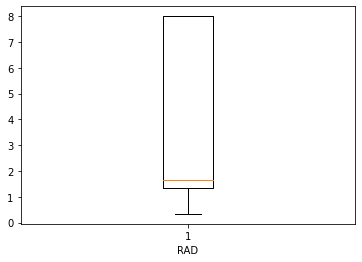

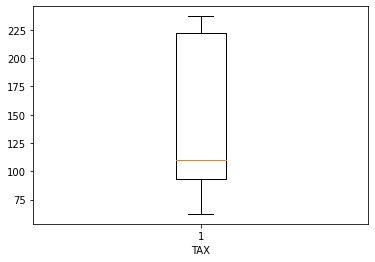

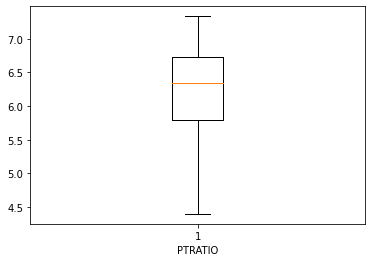

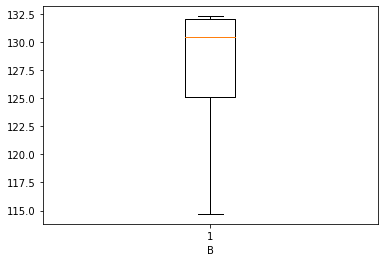

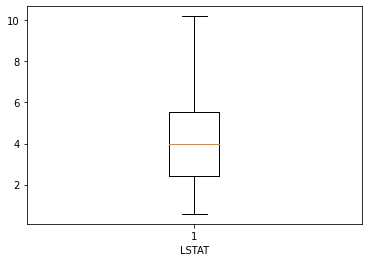

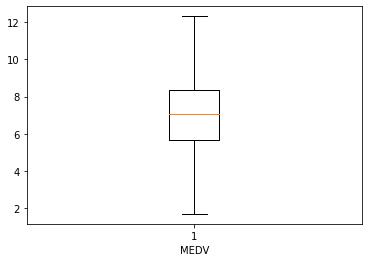

In [17]:
for feature in df.columns:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

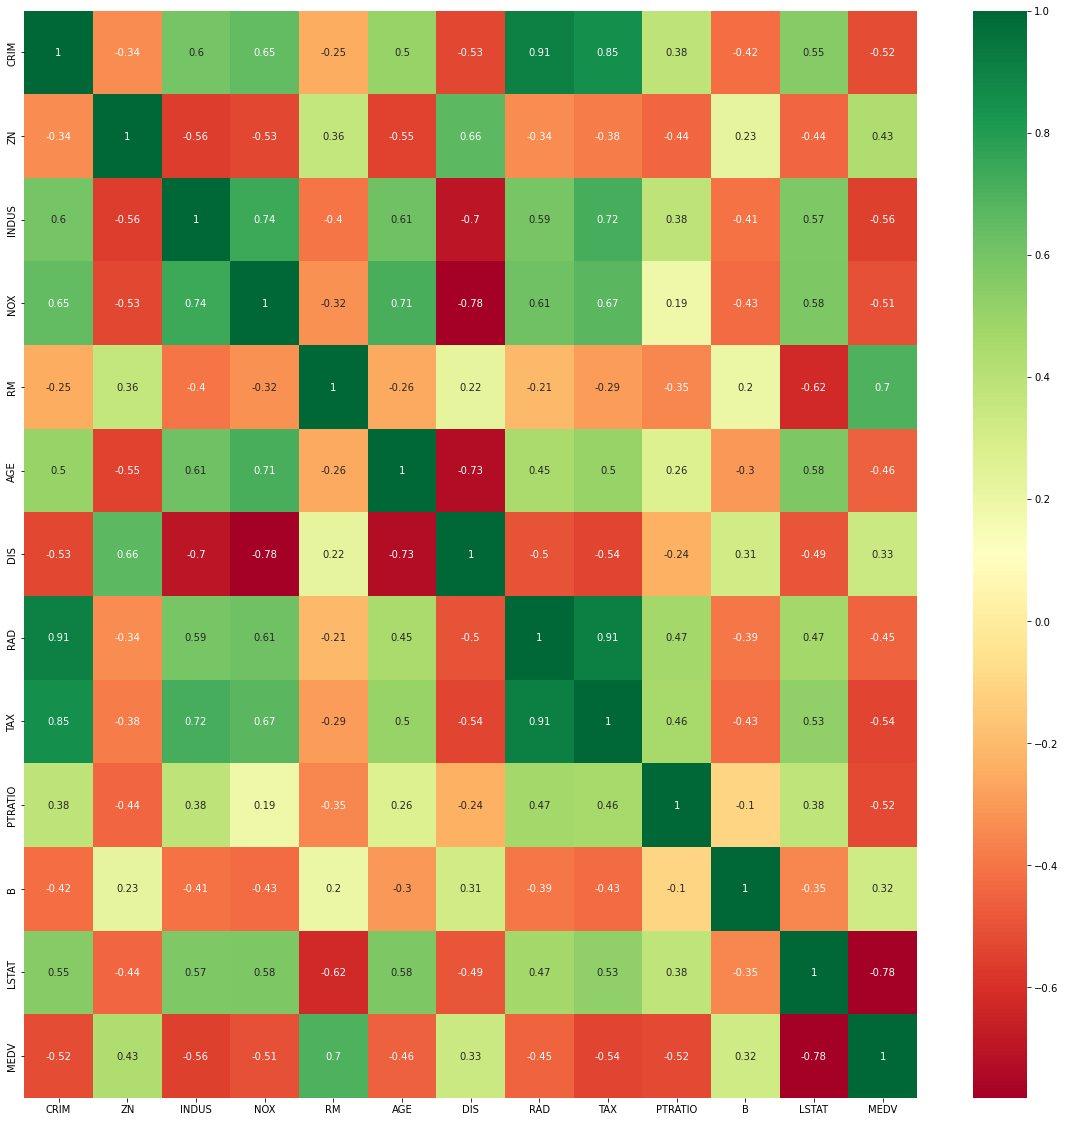

In [18]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
for feature in df.columns:
    mean_ordinal = df.groupby([feature])['MEDV'].mean().sort_values().to_dict()
    df[feature] = df[feature].map(mean_ordinal)
    


In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor(random_state=0)
model.fit(X,y)

ExtraTreesRegressor(random_state=0)

In [22]:
print(model.feature_importances_)

[1.92674731e-01 2.36238212e-04 6.32442166e-03 2.47411466e-02
 2.69047589e-01 1.36229369e-02 3.03808303e-01 8.10527103e-04
 1.83872167e-03 3.95068073e-04 9.62165007e-03 1.76878667e-01]


In [23]:
df = df.drop(columns=['ZN'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
lg = LinearRegression()
lg.fit(X_train_scaled,y_train)

LinearRegression()

In [29]:
y_pred = lg.predict(X_test_scaled)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 97.6 %
loss 0.1422118354957139


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [34]:
####Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [36]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=0)


In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [40]:
rf = RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=2, max_features='auto',max_depth=15,random_state=0)

In [41]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=0)

In [42]:
y_pred = rf.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 98.8 %
loss 0.07527669880587023
